Land-use Land Cover future projections dataset from 2020-2100 under all SSP scenarios.
Data from: Chen, G., Li, X. & Liu, X. Global land projection based on plant functional types with a 1-km resolution under socio-climatic scenarios. Sci Data 9, 125 (2022).

Metadata:
time resolution    - 5 years, 2020-2100
spatial resolution - 1km

In [1]:
from pathlib import Path
import xarray as xr

masterpath = Path(r"D:\OneDrive - National University of Singapore\Documents\ICARUS\project\publishing-projects\conservation-tipping-points\data")


In [2]:
lulcpath = masterpath / "Global 7-land-types LULC projection dataset under SSPs-RCPs"

sspdirs = [i for i in list(lulcpath.iterdir()) if i.is_dir()]

tifs = list(sspdirs[1].glob('*.tif'))


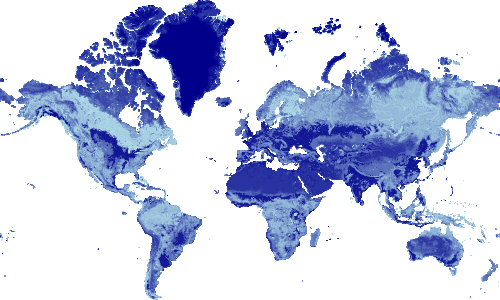

In [3]:
ds = xr.open_dataset(tifs[0], engine='rasterio')
ds = ds.rio.reproject('epsg:3857')
ds = ds.isel(y = slice(None, None, -1)).isel(band=0)

import datashader as dsh
import datashader.transfer_functions as tf

canvas = dsh.Canvas(plot_width=500, plot_height=300)
agg = canvas.raster(ds.band_data)
img = tf.shade(agg)
img.to_pil()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
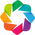

BokehModel(combine_events=True, render_bundle={'docs_json': {'7deff085-8fc1-41c1-99cd-4e282d799f57': {'version…

In [4]:
import holoviews as hv
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
from bokeh.models import ColorMapper
hv.extension('bokeh')

hv_image = hv.Image(
    ds, bounds=(
        ds.x.min(), ds.y.min(), ds.x.max(), ds.y.max())
        ).options(colorbar=True, colorbar_position = 'bottom', height=400, width = 800)

# Apply Datashader
shaded_image = datashade(
    hv_image, cmap='viridis')#, aggregator=dsh.mean('band_data'))

# Overlay with Esri Imagery basemap
map_tiles = EsriImagery().opts(width=800, height=400)
overlay = map_tiles * shaded_image

# Display the interactive plot
overlay.opts(
    title="Interactive Raster Exploration")


CRS:

In [5]:
ds.rio.crs

CRS.from_epsg(3857)

In [6]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:      (x: 31227, y: 20255)
Coordinates:
  * x            (x) float64 250kB -2.004e+07 -2.004e+07 ... 2.003e+07 2.004e+07
  * y            (y) float64 162kB -7.554e+06 -7.553e+06 ... 1.844e+07 1.844e+07
    band         int32 4B 1
    spatial_ref  int32 4B 0
Data variables:
    band_data    (y, x) float32 3GB nan nan nan nan nan ... nan nan nan nan nan

In [7]:
ds1 = xr.open_dataset(tifs[0], engine='rasterio')
ds1 = ds1.rio.reproject('epsg:3857')
ds1 = ds1.isel(y = slice(None, None, -1)).isel(band=0)

ds2 = xr.open_dataset(tifs[1], engine='rasterio')
ds2 = ds2.rio.reproject('epsg:3857')
ds2 = ds2.isel(y = slice(None, None, -1)).isel(band=0)

print(tifs[0])
print(tifs[1])


D:\OneDrive - National University of Singapore\Documents\ICARUS\project\publishing-projects\conservation-tipping-points\data\Global 7-land-types LULC projection dataset under SSPs-RCPs\SSP1_RCP26\global_SSP1_RCP26_2020.tif
D:\OneDrive - National University of Singapore\Documents\ICARUS\project\publishing-projects\conservation-tipping-points\data\Global 7-land-types LULC projection dataset under SSPs-RCPs\SSP1_RCP26\global_SSP1_RCP26_2025.tif


In [ ]:
mds = xr.open_dataset(r)

In [3]:
import xarray as xr
ds = xr.open_dataset(r"C:\Users\gwee\Downloads\Polygon_002_utm_50N_0_waveforms 1.h5")


In [12]:
ds.variables

Frozen({'BEAMDENSE': <xarray.Variable (phony_dim_0: 7552)> Size: 30kB
[7552 values with dtype=float32], 'FSIGMA': <xarray.Variable (phony_dim_1: 1)> Size: 4B
[1 values with dtype=float32], 'GRWAVECOUNT': <xarray.Variable (phony_dim_0: 7552, phony_dim_2: 1023)> Size: 31MB
[7725696 values with dtype=float32], 'GRWAVEFRAC': <xarray.Variable (phony_dim_0: 7552, phony_dim_2: 1023)> Size: 31MB
[7725696 values with dtype=float32], 'GRWAVEINT': <xarray.Variable (phony_dim_0: 7552, phony_dim_2: 1023)> Size: 31MB
[7725696 values with dtype=float32], 'IDLENGTH': <xarray.Variable (phony_dim_1: 1)> Size: 4B
[1 values with dtype=int32], 'INCIDENTANGLE': <xarray.Variable (phony_dim_0: 7552)> Size: 30kB
[7552 values with dtype=float32], 'LAT0': <xarray.Variable (phony_dim_0: 7552)> Size: 60kB
[7552 values with dtype=float64], 'LON0': <xarray.Variable (phony_dim_0: 7552)> Size: 60kB
[7552 values with dtype=float64], 'NBINS': <xarray.Variable (phony_dim_1: 1)> Size: 4B
[1 values with dtype=int32], 'NPBI

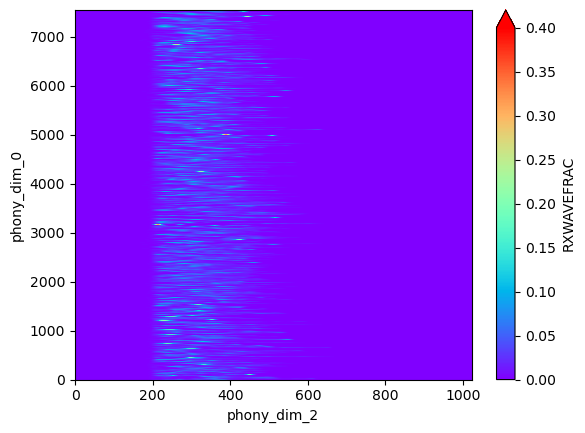

In [ ]:
ds.RXWAVEFRAC.plot(cmap='turbo', vmin=0, vmax=0.4)

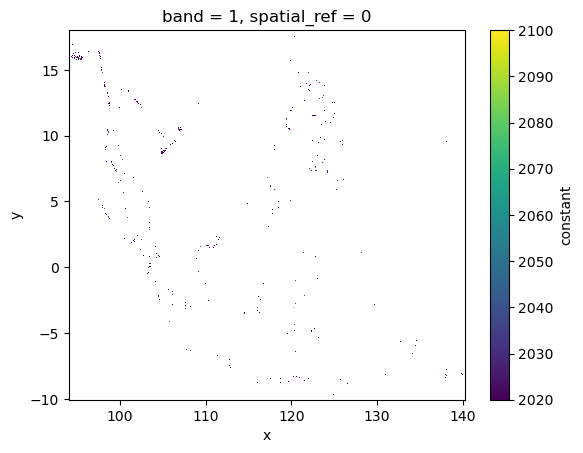

In [2]:
import rioxarray as rx

ds = rx.open_rasterio('./lulc-years-chen.tif')
ds.plot()